# Max e Min

A normalização máxima e mínima escala os dados do array de acordo com a seguinte fórmula.
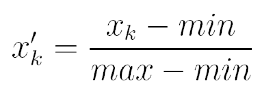

Ou seja, todos os pontos do array(xk) serão transformados em (xk').
Vamos entender abaixo como, de fato, ocorre a normalização, em um array qualquer, para depois trabalharmos com uma imagem e perceber a transformação.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]] 
scaler = MinMaxScaler([0,1]) #Define o intervalo da normalização
scaler.fit(data) #computa o mínimo e o máximo para normalizar 
datanorm_maxmin = scaler.transform(data) #altera o valor dos elementos de acordo com o intervalo estabelecido
print('data_max =',scaler.data_max_)
print('data_min =',scaler.data_min_)

data_max = [ 1. 18.]
data_min = [-1.  2.]


In [2]:
datanorm_maxmin

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

Agora que já entendemos como funciona a normalização max e min, vamos normalizar uma imagem utilizando o método máx e min:

In [3]:
from PIL import Image
img_original = Image.open('/Users/marinaradonascimento/Desktop/folhas.jpg').convert('L')

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler([0,1]) #Define o intervalo da normalização
scaler.fit(img_original) #computa o mínimo e o máximo para normalizar
imgnorm_maxmin = scaler.transform(img_original) #altera o valor dos elementos de acordo com o intervalo estabelecido

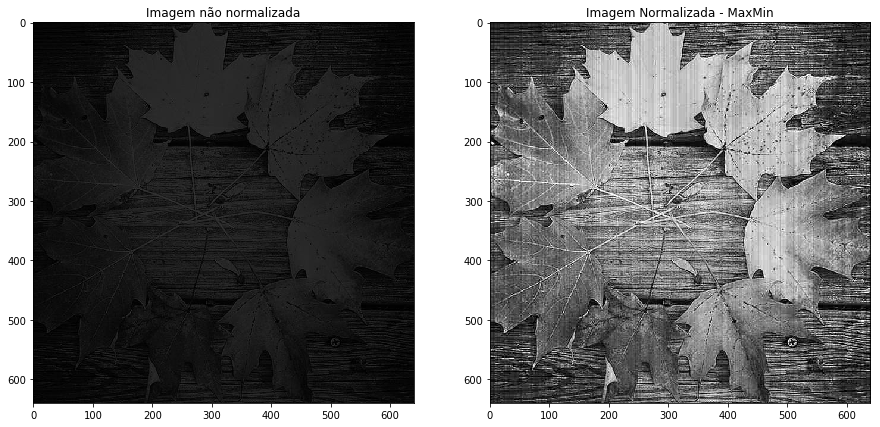

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline 
figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,2,1)
plt.title("Imagem não normalizada")
plt.imshow(img_original, cmap='gray')

figure.add_subplot(1,2,2)
plt.title("Imagem Normalizada - MaxMin")
plt.imshow(imgnorm_maxmin,cmap='gray')


In [6]:
print(np.min(img_original),np.max(img_original))#valores máximos e mínimos do array para plotar o histograma
print(np.min(imgnorm_maxmin),np.max(imgnorm_maxmin)) 

0 61
0.0 1.0


<BarContainer object of 200 artists>

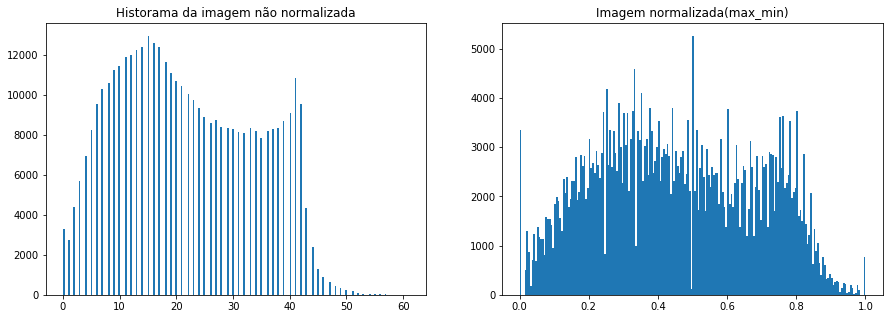

In [7]:
nbins=200
h, bin_edges = np.histogram(img_original, nbins,(0,61))
w=60./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,5))
figure.add_subplot(1,2,1)
plt.title('Historama da imagem não normalizada')
plt.bar(bin_centers, h, width=w)


nbins=200
h, bin_edges = np.histogram(imgnorm_maxmin, nbins,(0,1))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,2,2)
plt.title("Imagem normalizada(max_min)")
plt.bar(bin_centers, h, width=w)

O histograma da imagem normalizada tentou distribuir melhor a gama de pixels, de forma a se aproximar de uma distribuição mais uniforme.

# Decimal Scaling

A implementação da normalização por decimal scaling é muito simples. Basta dividir todo o array pela potência de 10^n, onde n corresponde ao número de dígitos do maior valor do array.
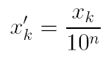

Vamos utilizar uma imagem para visualizar a normalização. 

In [8]:
img_original = Image.open('/Users/marinaradonascimento/Desktop/folhas.jpg').convert('L')
maximo= np.max(img_original) #Computando o valor máximo do array
maximo

61

Como o 61 é o valor máximo e tem dois digitos, vamos dividir o array por 10²

In [9]:
imgarray_decscaling =np.array(img_original) #transformando a imagem em um array para utilizar o a função

In [10]:
imgnorm_decscaling =(imgarray_decscaling/100) #array da imagem normalizada pelo método decimal scaling

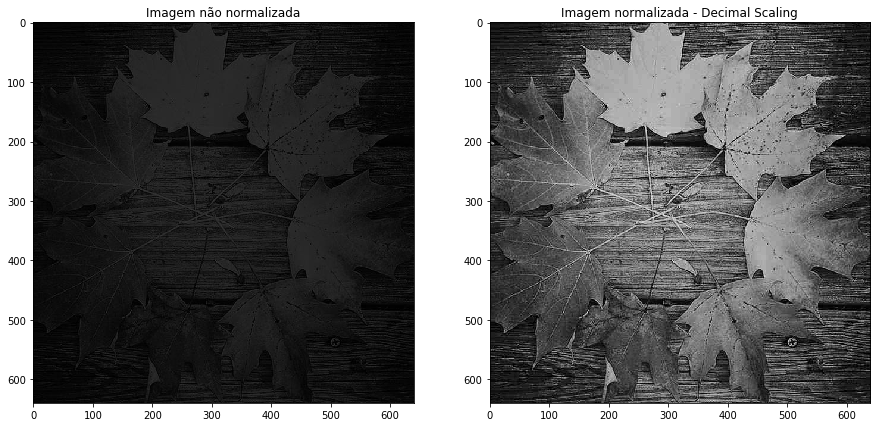

In [11]:
figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,2,1)
plt.title("Imagem não normalizada")
plt.imshow(img_original, cmap='gray')

figure.add_subplot(1,2,2)
plt.title("Imagem normalizada - Decimal Scaling")
plt.imshow(imgnorm_decscaling,cmap='gray')



In [12]:
print(np.min(img_original),np.max(img_original)) #valores máximos e mínimos do array para plotar o histograma
print(np.min(imgnorm_decscaling),np.max(imgnorm_decscaling))

0 61
0.0 0.61


<BarContainer object of 200 artists>

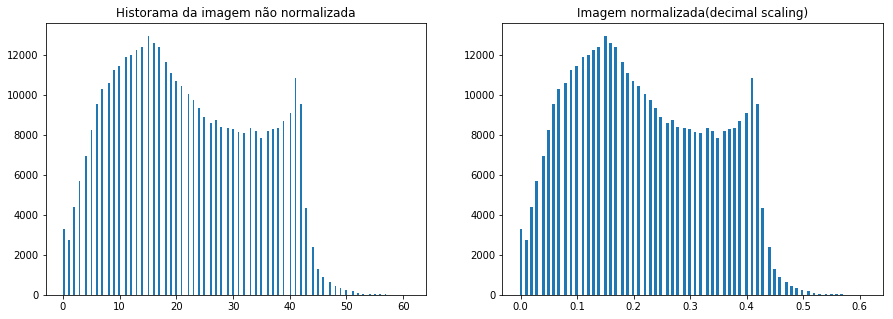

In [13]:
nbins=200
h, bin_edges = np.histogram(img_original, nbins,(0,61))
w=60./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,5))
figure.add_subplot(1,2,1)
plt.title('Historama da imagem não normalizada')
plt.bar(bin_centers, h, width=w)


nbins=200
h, bin_edges = np.histogram(imgnorm_decscaling, nbins,(0,0.61))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,2,2)
plt.title("Imagem normalizada(decimal scaling)")
plt.bar(bin_centers, h, width=w)

Perceba que o histograma não mudou, ou seja reteve a distribuição de entrada. Isso porque a normalização diminuiu o valor de odos os pontos na mesma intensidade.

# Z-score

A técnica do Z-score é bastante utilizada, por ser de fácil implementação e de simples interpretação. Os dados do array serão normalizados de acordo com a fórmula a seguir:
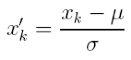

A média e o desvio padrão dos novos dados será 0 e 1, respectivamente.

Para uma normalização mais coerente, os dados devem seguir uma distribuição normal. Veremos a seguir um exemplo em um array pequeno, e depois em uma imagem, comparando o histograma para visualizar o que acontece quando se aplica a normalização z-score

In [14]:
a = np.array([ 0.7972,  0.0767,  0.4383,  0.7866,  0.8091, 0.1954,  0.6307,  0.6599,  0.1065,  0.0508])
from scipy import stats
import numpy as np
a_zscore=stats.zscore(a)
a_zscore

array([ 1.12724554, -1.2469956 , -0.05542642,  1.09231569,  1.16645923,
       -0.8558472 ,  0.57858329,  0.67480514, -1.14879659, -1.33234306])

In [15]:
print('a_mean =',np.mean(a))#Verificando a próximidade da média
print('a_zscore_mean =', np.mean(a_zscore))
print('a_std =',np.std(a))
print('a_zscore_std =',np.std(a_zscore)) #Verificando a próximidade do desvio do 1

a_mean = 0.45511999999999986
a_zscore_mean = 5.329070518200751e-16
a_std = 0.30346538451691657
a_zscore_std = 0.9999999999999998


Agora, vamos verificar utilizando uma imagem

In [16]:
img_original = Image.open('/Users/marinaradonascimento/Desktop/folhas.jpg').convert('L')
from scipy import stats
imgnorm_zscore=stats.zscore(img_original)

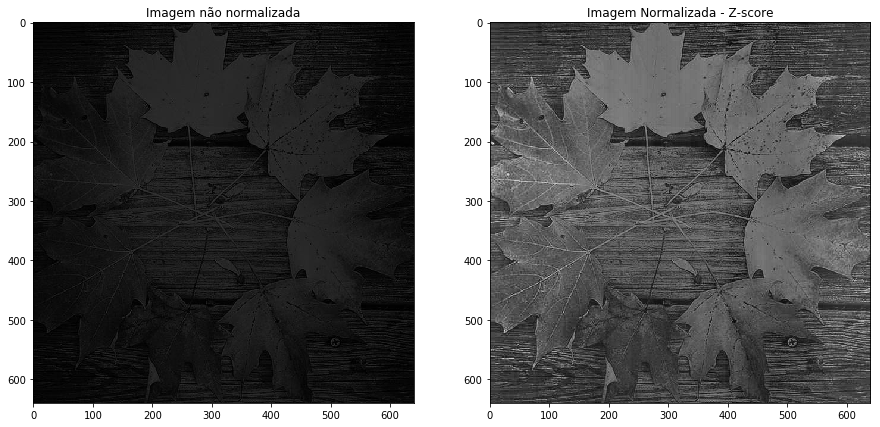

In [17]:
figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,2,1)
plt.title("Imagem não normalizada")
plt.imshow(img_original, cmap='gray')

figure.add_subplot(1,2,2)
plt.title("Imagem Normalizada - Z-score")
plt.imshow(imgnorm_zscore,cmap='gray')


In [18]:
print(np.min(img_original),np.max(img_original)) #valores máximos e mínimos do array para plotar o histograma
print(np.min(imgnorm_zscore),np.max(imgnorm_zscore))

0 61
-2.9962550708651605 6.151648025758078


<BarContainer object of 200 artists>

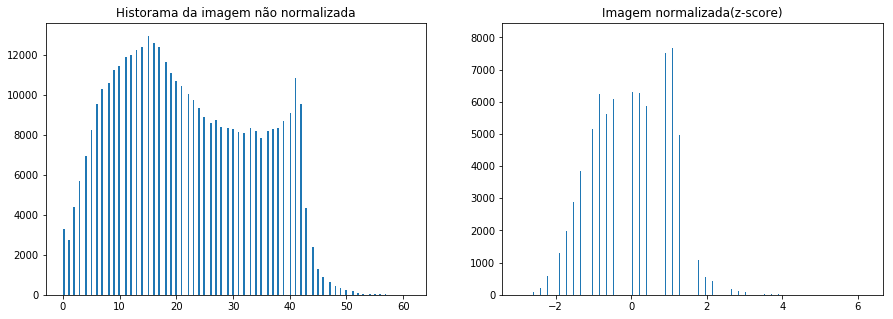

In [19]:
nbins=200
h, bin_edges = np.histogram(img_original, nbins,(0,61))
w=60./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,5))
figure.add_subplot(1,2,1)
plt.title('Historama da imagem não normalizada')
plt.bar(bin_centers, h, width=w)


nbins=200
h, bin_edges = np.histogram(imgnorm_zscore, nbins,(-3,6.2))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,2,2)
plt.title("Imagem normalizada(z-score)")
plt.bar(bin_centers, h, width=w)

Note que a distribuição dos pixels agora segue uma distribuição gaussiana, ou seja, uma distribuição normal, devido a alteração dos dados seguindo a normalização z-score.

# Mediana e DMA

Essa técnica de normalização se assemelha ao z-score, no entanto, utiliza a mediana e o desvio médio absoluto(MAD), ao invés da média e desvio padrão, a técnica é robusta pois a mediana e o MAD são menos afetados pelos outliers do que a média e o desvio padrão
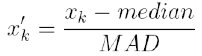

Vamos definir uma função cujo parâmetro de entrada é um array qualquer, e a saída seja o array normalizado:

In [20]:
import numpy as np
import scipy.stats as stats
def medianmad_norm(array): #definindo a função para calcular a normalização diretamente
    median = np.median(array)
    desvio = [abs(x - median) for x in array] #|xk-median| 
    mad = (np.median(desvio)) 
    norm = [(x - median) / mad for x in array]
    return (norm,mad)

In [21]:
#exemplo em um array
r = [-1, 2,-0.5, 6,0, 10,1, 18]
print (medianmad_norm(r))

([-1.1111111111111112, 0.2222222222222222, -0.8888888888888888, 2.0, -0.6666666666666666, 3.7777777777777777, -0.2222222222222222, 7.333333333333333], 2.25)


Agora, vamos verificar com a imagem:

In [22]:
img_original= Image.open('/Users/marinaradonascimento/Desktop/folhas.jpg').convert('L')

In [23]:
img_array= np.array(img_original) #array da imagem original

In [24]:
imgnorm_medianmad,MAD = medianmad_norm(img_array) #imagem normalizada pelo método median mad

In [25]:
MAD

10.0

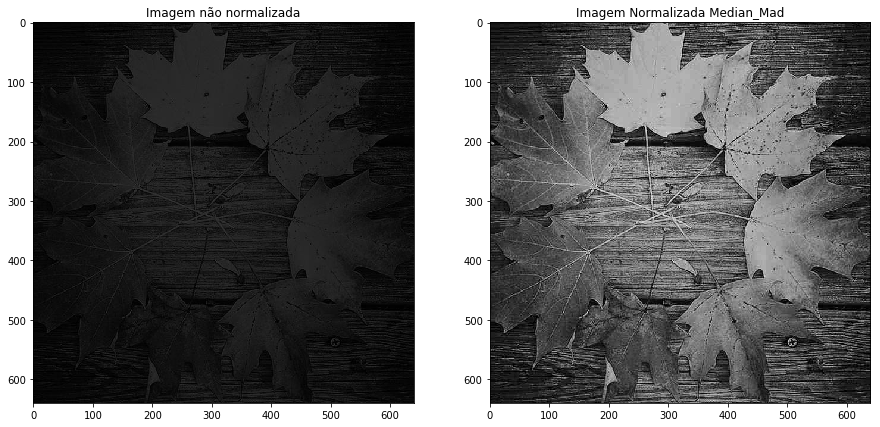

In [26]:
figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,2,1)
plt.title("Imagem não normalizada")
plt.imshow(img_original, cmap='gray')

figure.add_subplot(1,2,2)
plt.title("Imagem Normalizada Median_Mad")
plt.imshow(imgnorm_medianmad,cmap='gray')



In [27]:
print(np.min(img_original),np.max(img_original)) #valores máximos e mínimos do array para plotar o histograma
print(np.min(imgnorm_medianmad),np.max(imgnorm_medianmad))

0 61
-2.1 4.0


<BarContainer object of 200 artists>

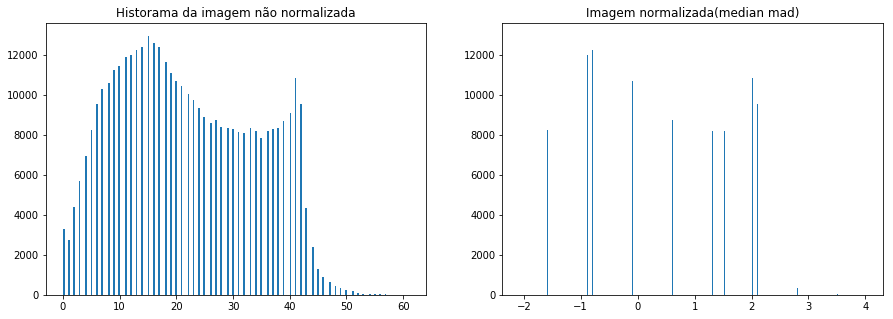

In [28]:
nbins=200
h, bin_edges = np.histogram(img_original, nbins,(0,61))
w=60./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,5))
figure.add_subplot(1,2,1)
plt.title('Historama da imagem não normalizada')
plt.bar(bin_centers, h, width=w)


nbins=200
h, bin_edges = np.histogram(imgnorm_medianmad, nbins,(-2.1,4))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,2,2)
plt.title("Imagem normalizada(median mad)")
plt.bar(bin_centers, h, width=w)

Observe que a distribuição dos pixels está mais uniforme, porém o gráfico segue o mesmo formato, isso acontece porque  a média e a mediana possuem valores muito próximos, o que mostra que os outliers não apresentam grande influência. Mesmo assim, a mínima influência dos outliers representa um intervalo de distribuição menor e mais centralizado, em comparação com o z-score, que utiliza a média. Além disso, o MAD também é menor do que o desvio padrão(do z-score), o que explica a maior intensidade de pixels mais claros.

# Robust Scaler

As estatística para normalização segundo o Robust Scaler são baseadas em quartis e na mediana, logo não são influenciadas pelos outliers extremos, já que estes não cairão dentro do intervalo interquartil.
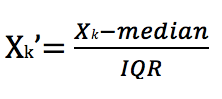

Onde IQR é o intervalo interquartil (Q3-Q1)

Primeiro, vamos entender a normalização com um array qualquer:

In [29]:
from sklearn.preprocessing import RobustScaler #importando o Robust Scaler
scaler = RobustScaler() 

In [30]:
rs= np.random.randint(0,255,10).reshape(5,2)
rs

array([[138,  47],
       [106,  25],
       [ 10, 189],
       [163, 250],
       [ 74, 135]])

In [31]:
rsnorm = scaler.fit_transform(rs)
rsnorm

array([[ 0.5       , -0.61971831],
       [ 0.        , -0.77464789],
       [-1.5       ,  0.38028169],
       [ 0.890625  ,  0.80985915],
       [-0.5       ,  0.        ]])

Agora, vamos trabalhar na imagem:

In [32]:
img_original= Image.open('/Users/marinaradonascimento/Desktop/folhas.jpg').convert('L')

In [33]:
from sklearn.preprocessing import RobustScaler #importando o Robust Scaler
scaler = RobustScaler() 
imgnorm_rs = scaler.fit_transform(img_original)

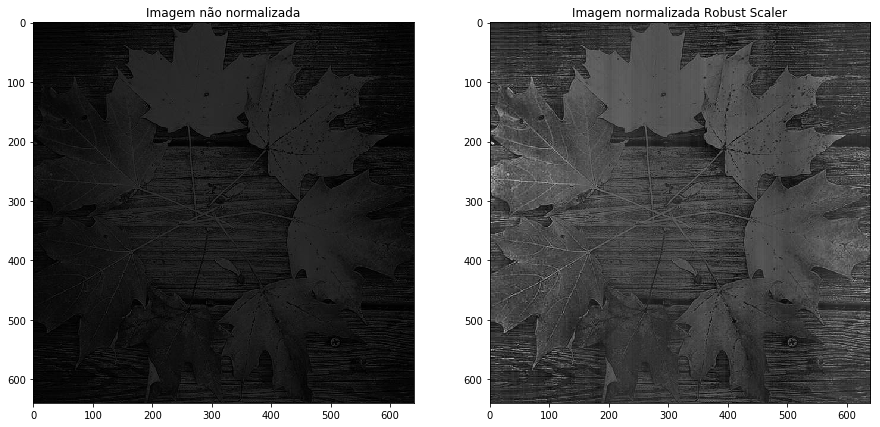

In [34]:
figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,2,1)
plt.title("Imagem não normalizada")
plt.imshow(img_original, cmap='gray')

figure.add_subplot(1,2,2)
plt.title("Imagem normalizada Robust Scaler")
plt.imshow(imgnorm_rs,cmap='gray')

In [35]:
print(np.min(img_original),np.max(img_original)) #valores máximos e mínimos do array para plotar o histograma
print(np.min(imgnorm_rs),np.max(imgnorm_rs))

0 61
-2.142857142857143 6.0


<BarContainer object of 200 artists>

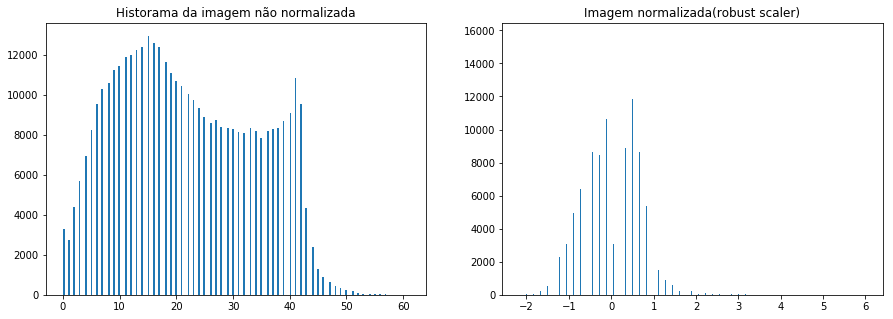

In [36]:
nbins=200
h, bin_edges = np.histogram(img_original, nbins,(0,61))
w=60./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,5))
figure.add_subplot(1,2,1)
plt.title('Historama da imagem não normalizada')
plt.bar(bin_centers, h, width=w)


nbins=200
h, bin_edges = np.histogram(imgnorm_rs, nbins,(-2.2,6))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,2,2)
plt.title("Imagem normalizada(robust scaler)")
plt.bar(bin_centers, h, width=w)

Note que os outliers ainda aparecem no resultado final(valores que ficaram entre 3 e 6), no entanto eles não influenciaram na normalização. Ao analisar o histograma, verifica-se que os dados são centralizados e distribuidos entre os intervalos, resultado de tirar a mediana e dividir no interquartil.

# Tanh

Os estimadores de tanh são bastante utilizados na literatura, tendo em vista, em comparação com outro métodos, apresentar melhores resultados de normalização. Eles foram introduzidos por Hampel et al. e pertencem a classe dos estimadores-M (Huber, 1964),são robustos e altamente eficientes.
A normalização Tanh é dada por:
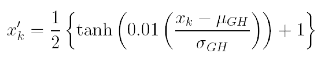



Onde a média o desvio padrão, não são calculados em torno dos dados, ou do array, mas sim, em torno dos estimadores propostos, de acordo com a função:
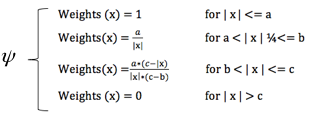
a, b e c são os limites dos intervalos para o cálculo dos estimadores (a função utiliza como padrão a=2, b=4 e c=8)

Vamos ver a implementação do método em um exemplo em um array qualquer

In [37]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm 
x = [-1, 2,-0.5, 6,0.2, 10,1, 18]

In [38]:
x_estimadores = sm.robust.norms.Hampel().weights(x) 
#calcula os estimadores de Hampel, com os limites dos intervalos a,b,c default(a=2,b=4,c=8)

Os estimadores são um novo array, de onde será calculado a nova média e o novo desvio Padrão de Hampel. Note que não estamos procurando a média e o desvio padrão de t. Queremos a média e o desvio dos estimadores.

In [39]:
x_estimadores

array([1.        , 1.        , 1.        , 0.16666667, 1.        ,
       0.        , 1.        , 0.        ])

In [40]:
mediaE = np.mean(x_estimadores)
stdE = np.std(x_estimadores)

In [41]:
#A normalização tanh vai ser feita agora baseada na média e desvio dos estimadores
x_norm = 0.5*(np.tanh(0.01*((x-mediaE)/stdE))+1) 
x_norm #array normalizado.

array([0.48210848, 0.5147229 , 0.48754114, 0.55796709, 0.49515152,
       0.60034976, 0.50385164, 0.68025342])

Implementando em uma imagem:

In [42]:
img_original= Image.open('/Users/marinaradonascimento/Desktop/folhas.jpg').convert('L')
img_array= np.array(img_original) #array da imagem original

In [ ]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
img_estimadores = sm.robust.norms.Hampel().weights(img_array) 

In [44]:
mediaA = np.mean(img_estimadores)
stdA = np.std(img_estimadores)
print(mediaA,stdA)

0.05485088820684523 0.1881232491924446


In [45]:
imgnorm_tanh = 0.5*(np.tanh(0.01*((img_array-mediaA)/stdA))+1) #array normalizado.

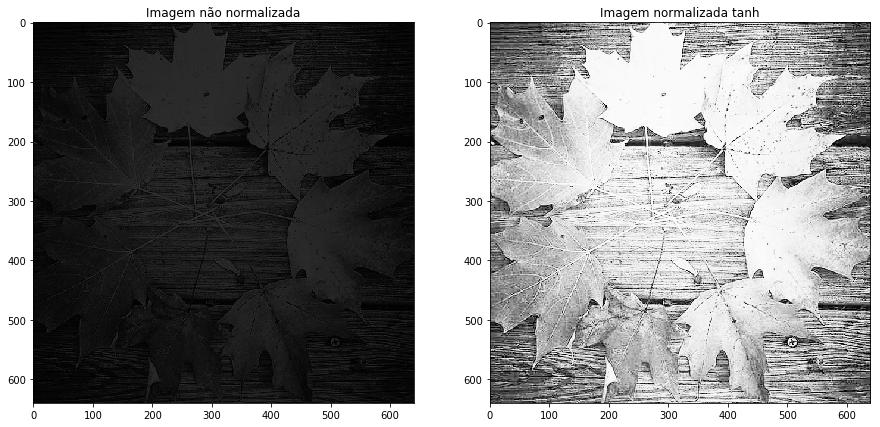

In [46]:
figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,2,1)
plt.title("Imagem não normalizada")
plt.imshow(img_original, cmap='gray')

figure.add_subplot(1,2,2)
plt.title("Imagem normalizada tanh")
plt.imshow(imgnorm_tanh,cmap='gray')


In [47]:
print(np.min(img_original),np.max(img_original)) #valores máximos e mínimos do array para plotar o histograma
print(np.min(imgnorm_tanh),np.max(imgnorm_tanh))

0 61
0.49854215964775034 0.9984674351136635


<BarContainer object of 200 artists>

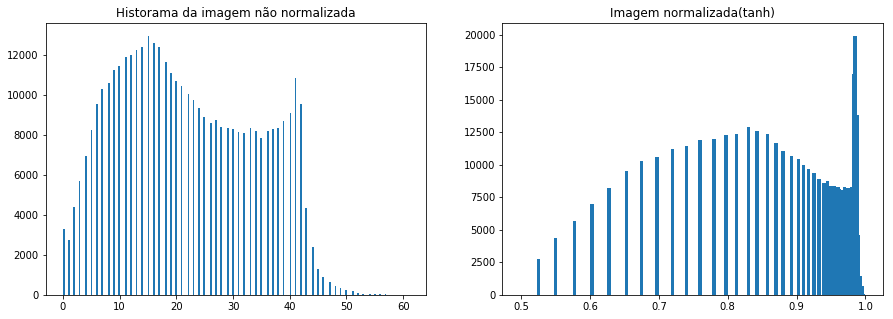

In [48]:
nbins=200
h, bin_edges = np.histogram(img_original, nbins,(0,61))
w=60./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,5))
figure.add_subplot(1,2,1)
plt.title('Historama da imagem não normalizada')
plt.bar(bin_centers, h, width=w)


nbins=200
h, bin_edges = np.histogram(imgnorm_tanh, nbins,(0.5,1))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,2,2)
plt.title("Imagem normalizada(tanh)")
plt.bar(bin_centers, h, width=w)

Perceba que a partir de um certo valor, a frequência dos valores dos pixels altos se torna bem maior, provavelmente isso acontece por causa da função tangente hiperbólica, que a partir de determinado valor seu correspondente se aproxima cada vez mais de 1. 
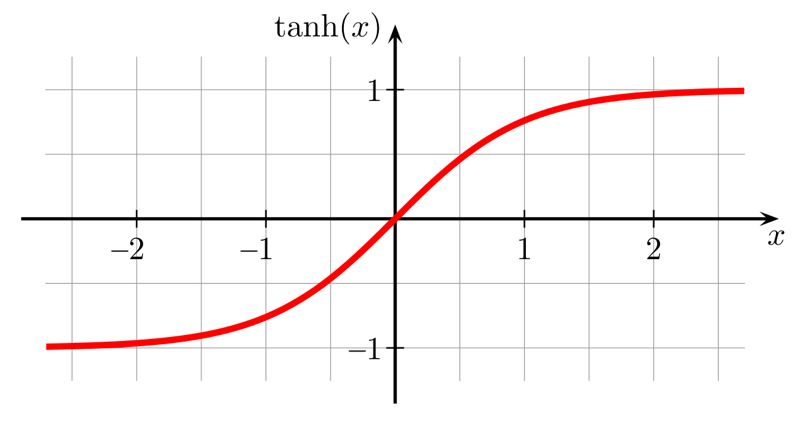

## Tanh Modificado

In [49]:
img_original= Image.open('/Users/marinaradonascimento/Desktop/folhas.jpg').convert('L')
img_array= np.array(img_original) #array da imagem original

In [50]:
media = np.mean(img_array)
std = np.std(img_array)
print(media,std)

21.89410400390625 12.011902845252811


In [51]:
imgnorm_tanh_modified = 0.5*(np.tanh(0.01*((img_array-media)/std))+1) #array normalizado.

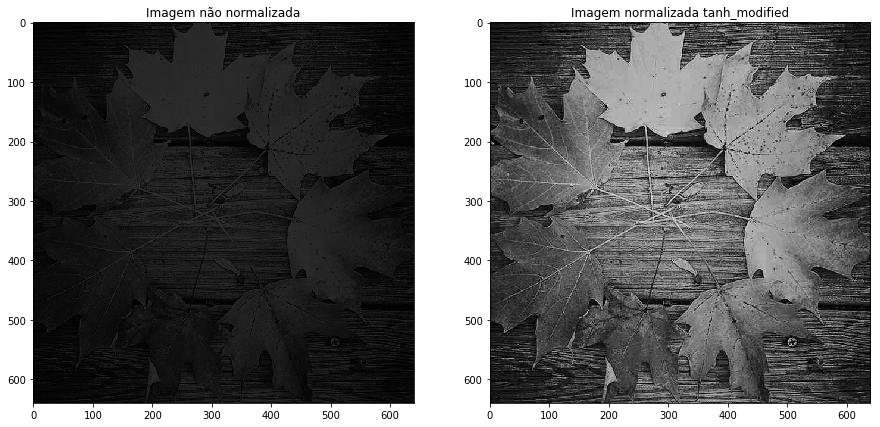

In [52]:
figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,2,1)
plt.title("Imagem não normalizada")
plt.imshow(img_original, cmap='gray')

figure.add_subplot(1,2,2)
plt.title("Imagem normalizada tanh_modified")
plt.imshow(imgnorm_tanh_modified,cmap='gray')

In [53]:
print(np.min(img_original),np.max(img_original)) #valores máximos e mínimos do array para plotar o histograma
print(np.min(imgnorm_tanh_modified),np.max(imgnorm_tanh_modified))

0 61
0.49088750549045623 0.5162722286259657


<BarContainer object of 200 artists>

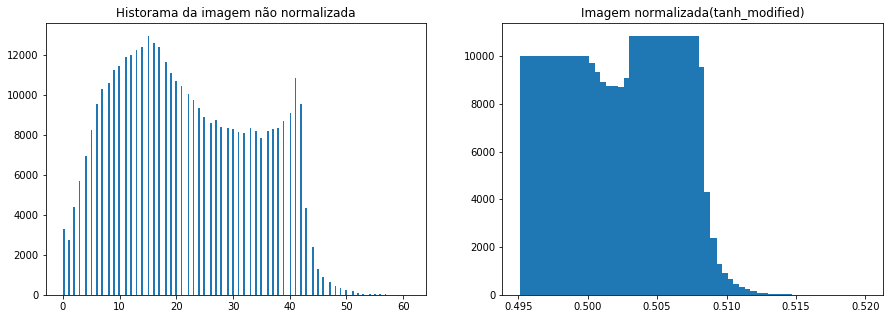

In [54]:
nbins=200
h, bin_edges = np.histogram(img_original, nbins,(0,61))
w=60./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,5))
figure.add_subplot(1,2,1)
plt.title('Historama da imagem não normalizada')
plt.bar(bin_centers, h, width=w)


nbins=200
h, bin_edges = np.histogram(imgnorm_tanh_modified, nbins,(0.5,0.52))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,2,2)
plt.title("Imagem normalizada(tanh_modified)")
plt.bar(bin_centers, h, width=w)

Note que aqui, ocorreu o oposto, a predominância dos pixels ficou em valores baixos, justamente porque a média e o desvio padrão que não foram calculados usando os estimadores, tem valores muitos altos, influenciando muito no cálculo da tangente hiperbólica(diminuindo, no caso).

# Comparando as Imagens 


Agora vamos plotar as imagens normalizadas para compará-las e ver qual método de normalização resultou na melhor imagem.

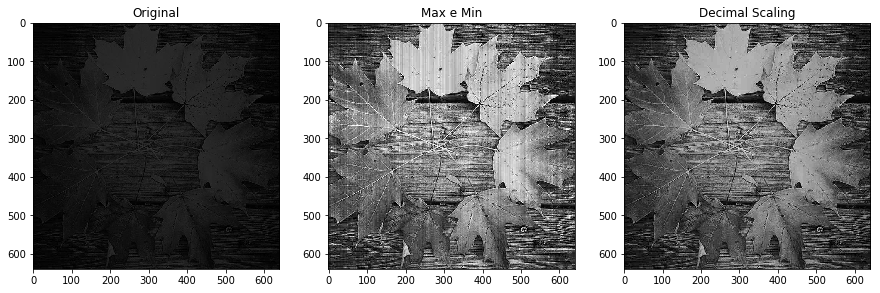

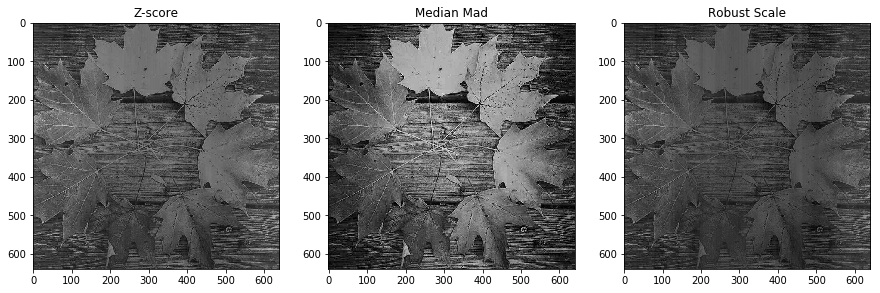

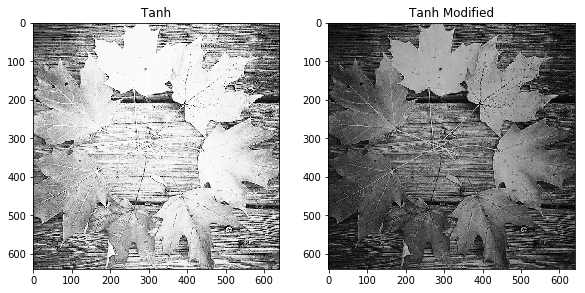

In [55]:
figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,3,1)
plt.title("Original")
plt.imshow(img_original, cmap='gray')

figure.add_subplot(1,3,2)
plt.title("Max e Min")
plt.imshow(imgnorm_maxmin, cmap='gray')

figure.add_subplot(1,3,3)
plt.title("Decimal Scaling")
plt.imshow(imgnorm_decscaling,cmap='gray')


figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,3,1)
plt.title("Z-score")
plt.imshow(imgnorm_zscore, cmap='gray')

figure.add_subplot(1,3,2)
plt.title("Median Mad")
plt.imshow(imgnorm_medianmad,cmap='gray')

figure.add_subplot(1,3,3)
plt.title("Robust Scale")
plt.imshow(imgnorm_rs,cmap='gray')


figure = plt.figure(figsize=(15,15))
figure.add_subplot(1,3,1)
plt.title("Tanh")
plt.imshow(imgnorm_tanh, cmap='gray')

figure.add_subplot(1,3,2)
plt.title("Tanh Modified")
plt.imshow(imgnorm_tanh_modified, cmap='gray')



É difícil dizer qual método é o melhor genericamente, pois para diferentes imagens pode-se obter diferentes resultados. No entanto, no caso da imagem trabalhada, os métodos Median Mad e Tanh apresentaram bons resultados. De toda forma, todas as imagens normalizadas resultaram em um aumento de contraste, que resultaram em uma melhor visualização da imagem.

# Comparando os histogramas das Imagens


Agora vamos plotar as imagens normalizadas para compará-las e ver qual método de normalização resultou na melhor imagem.

<BarContainer object of 200 artists>

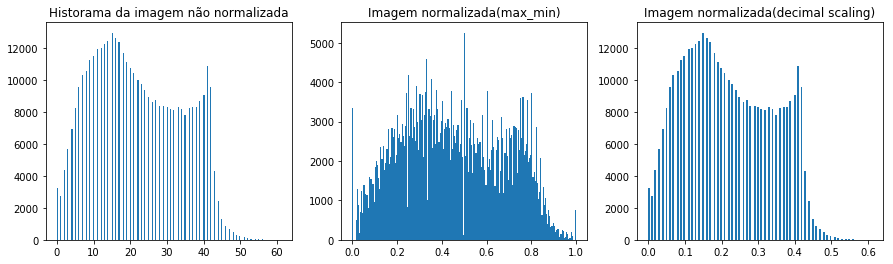

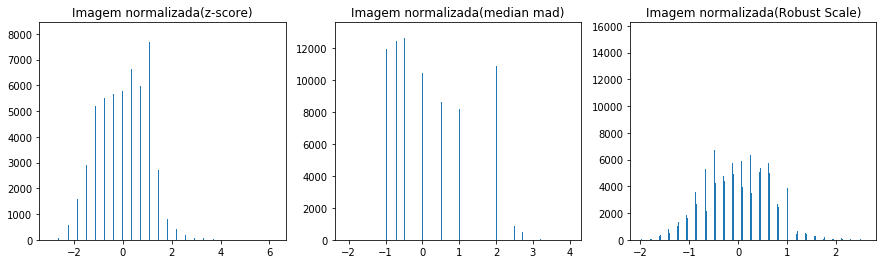

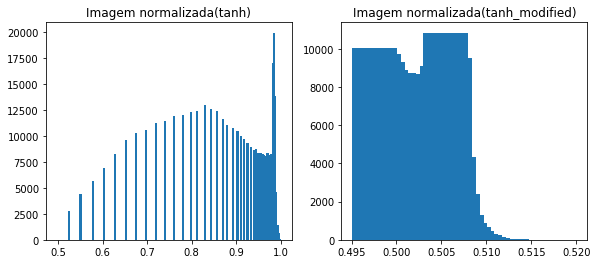

In [56]:
nbins=200
h, bin_edges = np.histogram(img_original, nbins,(0,61))
w=60./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,4))
figure.add_subplot(1,3,1)
plt.title('Historama da imagem não normalizada')
plt.bar(bin_centers, h, width=w)

nbins=200
h, bin_edges = np.histogram(imgnorm_maxmin, nbins,(0,1))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,3,2)
plt.title("Imagem normalizada(max_min)")
plt.bar(bin_centers, h, width=w)

nbins=200
h, bin_edges = np.histogram(imgnorm_decscaling, nbins,(0,0.61))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,3,3)
plt.title("Imagem normalizada(decimal scaling)")
plt.bar(bin_centers, h, width=w)

nbins=200
h, bin_edges = np.histogram(imgnorm_zscore, nbins,(-3,6.2))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,4))
figure.add_subplot(1,3,1)
plt.title("Imagem normalizada(z-score)")
plt.bar(bin_centers, h, width=w)

nbins=200
h, bin_edges = np.histogram(imgnorm_medianmad, nbins,(-2.1,4))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,3,2)
plt.title("Imagem normalizada(median mad)")
plt.bar(bin_centers, h, width=w)

nbins=200
h, bin_edges = np.histogram(imgnorm_rs, nbins,(-2,2.6))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,3,3)
plt.title("Imagem normalizada(Robust Scale)")
plt.bar(bin_centers, h, width=w)

nbins=200
h, bin_edges = np.histogram(imgnorm_tanh, nbins,(0.5,1))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure = plt.figure(figsize=(15,4))
figure.add_subplot(1,3,1)
plt.title("Imagem normalizada(tanh)")
plt.bar(bin_centers, h, width=w)


nbins=200
h, bin_edges = np.histogram(imgnorm_tanh_modified, nbins,(0.5,0.52))
w=1./nbins
bin_centers = bin_edges[1:]-(w/2)
figure.add_subplot(1,3,2)
plt.title("Imagem normalizada(tanh_modified)")
plt.bar(bin_centers, h, width=w)